In [5]:
import pandas as pd
import pickle

In [ ]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 2

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")

  0%|          | 5/1230 [00:00<03:46,  5.41it/s]


KeyboardInterrupt: 

: 

In [2]:
from milestone1.question4 import *

#les donnes des saisons régulière  seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

df2015 = create_full_df(directory=directory2015)
df2016 = create_full_df(directory=directory2016)
df2017 = create_full_df(directory=directory2017)
df2018 = create_full_df(directory=directory2018)

In [3]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df =  pd.concat([df15_16, df17_18], ignore_index=True)

In [55]:
import importlib
importlib.reload(q6_model_noe)

<module 'q6_model_noe' from 'c:\\Users\\jager\\OneDrive\\Bureau\\Uni\\udem\\DataScience\\Devoir1\\ift-6758-a22\\q6_model_noe.py'>

In [4]:
import q6_model_noe

model = q6_model_noe.SVM(df)
model.train()

SVC(probability=True)

## ROC/AUC Curve

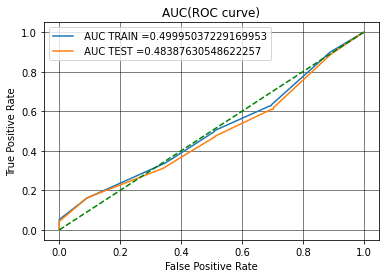

In [57]:
model.roc_auc_curve()

## Taux de buts

In [52]:
goal_rates = model.goals_rate_percentile()

KeyboardInterrupt: 

## Comet model upload

In [6]:
filename = 'svm_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [9]:
from comet_ml import Experiment

experiment = Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu",
)

experiment.log_model("SVM model", "q6_model_noe.py")

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/72d397cd796247618bdb0b43cac922c8
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (946.72 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model-element            : 1 (78.20 MB)
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: Co

{'web': 'https://www.comet.com/api/asset/download?assetId=a849dbe00f9e4400967c62c7ff2a615a&experimentKey=dccf63a1972b4fbca8ca4e8e1d76e6f9',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=a849dbe00f9e4400967c62c7ff2a615a&experimentKey=dccf63a1972b4fbca8ca4e8e1d76e6f9',
 'assetId': 'a849dbe00f9e4400967c62c7ff2a615a'}